In [24]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tools.eval_measures import rmse
import matplotlib.pylab as plt

In [15]:
#Make pylab inline and set the theme to 'ggplot'
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/akshah/virtualenvs/vanilla_ml/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
rmse?

In [17]:
data = pd.read_csv('Datasets/Housing.csv')

In [18]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [19]:
#Create a data frame with all the independent features
data_indep = data.drop('medv',axis=1)

In [20]:
data_indep

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [21]:
# Create a target vector(vector of dependent variable, i.e. 'medv')
data_dep = data['medv']

In [88]:
# Split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(
                                    data_indep, data_dep,
                                    test_size = 0.20,
                                    random_state = 42)

In [89]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((404, 13), (404,), (102, 13), (102,))

In [90]:
train_y,test_y

(477    12.0
 15     19.9
 332    19.4
 423    13.4
 19     18.2
 325    24.6
 335    21.1
 56     24.7
 437     8.7
 409    27.5
 334    20.7
 181    36.2
 227    31.6
 434    11.7
 180    39.8
 25     13.9
 493    21.8
 238    23.7
 244    17.6
 250    24.4
 418     8.8
 117    19.2
 42     25.3
 322    20.4
 347    23.1
 182    37.9
 155    15.6
 280    45.4
 126    15.7
 329    22.6
        ... 
 276    33.2
 443    15.4
 191    30.5
 385     7.2
 293    23.9
 413    16.3
 343    23.9
 257    50.0
 308    22.8
 149    15.4
 130    19.2
 151    19.6
 359    22.6
 99     33.2
 372    50.0
 87     22.2
 458    14.9
 330    19.8
 214    23.7
 466    19.0
 121    20.3
 505    11.9
 20     13.6
 188    29.8
 71     21.7
 106    19.5
 270    21.1
 348    24.5
 435    13.4
 102    18.6
 Name: medv, Length: 404, dtype: float64, 173    23.6
 274    32.4
 491    13.6
 72     22.8
 452    16.1
 76     20.0
 316    17.8
 140    14.0
 471    19.6
 500    16.8
 218    21.5
 9      18.9
 414     7

In [91]:
# GradientBoostingRegressor with a L1(Least Absolute Deviations) loss function
# Set a random seed so that we can reproduce the results
np.random.seed(32767)

In [92]:
mod = GradientBoostingRegressor(loss='lad') #least absolute deviation (L1 loss
fit = mod.fit(train_X,train_y)

In [93]:
predict = fit.predict(test_X)

print ("RMSE -> %f"%rmse(predict,test_y))

RMSE -> 3.372770


In [94]:
# GradientBoostingRegressor with L2(Least Square errors) loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 2.502158


In [96]:
a = stats.loc[['min','max'],:]

In [97]:
a

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97,50.0


In [98]:
extremes = a.drop('medv',axis=1)

In [99]:
extremes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


In [100]:
# To experiment with outlier data, we generate 5 random values lying between the min and max of the features
np.random.seed(1234) #This is used to reproduce the random number combination when used the first time

# Create 5 random values 
rands = np.random.rand(5, 1)
print (rands)

#Get the min max rows as numpy array
min_array = np.array(extremes.loc[['min'],:])
print (min_array)
max_array = np.array(extremes.loc[['max'],:])
print (max_array)

#Find the difference between min array and max array

range = max_array - min_array
print (range)

[[0.19151945]
 [0.62210877]
 [0.43772774]
 [0.78535858]
 [0.77997581]]
[[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
  2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 3.2000e-01
  1.7300e+00]]
[[ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
   24.     711.      22.     396.9     37.97  ]]
[[8.896988e+01 1.000000e+02 2.728000e+01 1.000000e+00 4.860000e-01
  5.219000e+00 9.710000e+01 1.099690e+01 2.300000e+01 5.240000e+02
  9.400000e+00 3.965800e+02 3.624000e+01]]


In [101]:
rands * range

array([[1.70394625e+01, 1.91519450e+01, 5.22465061e+00, 1.91519450e-01,
        9.30784529e-02, 9.99540012e-01, 1.85965386e+01, 2.10612024e+00,
        4.40494736e+00, 1.00356192e+02, 1.80028283e+00, 7.59527836e+01,
        6.94066488e+00],
       [5.53489427e+01, 6.22108771e+01, 1.69711273e+01, 6.22108771e-01,
        3.02344863e-01, 3.24678568e+00, 6.04067617e+01, 6.84126794e+00,
        1.43085017e+01, 3.25984996e+02, 5.84782245e+00, 2.46715896e+02,
        2.25452219e+01],
       [3.89445844e+01, 4.37727739e+01, 1.19412127e+01, 4.37727739e-01,
        2.12735681e-01, 2.28450107e+00, 4.25033635e+01, 4.81364817e+00,
        1.00677380e+01, 2.29369335e+02, 4.11464075e+00, 1.73594067e+02,
        1.58632533e+01],
       [6.98732589e+01, 7.85358584e+01, 2.14245822e+01, 7.85358584e-01,
        3.81684272e-01, 4.09878645e+00, 7.62583185e+01, 8.63650981e+00,
        1.80632474e+01, 4.11527898e+02, 7.38237069e+00, 3.11457507e+02,
        2.84613951e+01],
       [6.93943541e+01, 7.79975808e+

In [102]:
c = rands * range
c.shape

(404, 13)


In [103]:
#Generate 5 samples with 'rands' value
outliers_X = c + min_array
print (outliers_X)

[[1.70457825e+01 1.91519450e+01 5.68465061e+00 1.91519450e-01
  4.78078453e-01 4.56054001e+00 2.14965386e+01 3.23572024e+00
  5.40494736e+00 2.87356192e+02 1.44002828e+01 7.62727836e+01
  8.67066488e+00]
 [5.53552627e+01 6.22108771e+01 1.74311273e+01 6.22108771e-01
  6.87344863e-01 6.80778568e+00 6.33067617e+01 7.97086794e+00
  1.53085017e+01 5.12984996e+02 1.84478224e+01 2.47035896e+02
  2.42752219e+01]
 [3.89509044e+01 4.37727739e+01 1.24012127e+01 4.37727739e-01
  5.97735681e-01 5.84550107e+00 4.54033635e+01 5.94324817e+00
  1.10677380e+01 4.16369335e+02 1.67146407e+01 1.73914067e+02
  1.75932533e+01]
 [6.98795789e+01 7.85358584e+01 2.18845822e+01 7.85358584e-01
  7.66684272e-01 7.65978645e+00 7.91583185e+01 9.76610981e+00
  1.90632474e+01 5.98527898e+02 1.99823707e+01 3.11777507e+02
  3.01913951e+01]
 [6.94006741e+01 7.79975808e+01 2.17377400e+01 7.79975808e-01
  7.64068243e-01 7.63169374e+00 7.86356510e+01 9.70691596e+00
  1.89394436e+01 5.95707323e+02 1.99317726e+01 3.09642806e+0

In [105]:
# We will also create some hard coded outliers
# for 'medv', i.e. our target
medv_outliers = np.array([0, 0, 600, 700, 600])
print (train_X.shape)

(404, 13)


(404, 13)
(5, 13)


Text(0,0.5,'count')

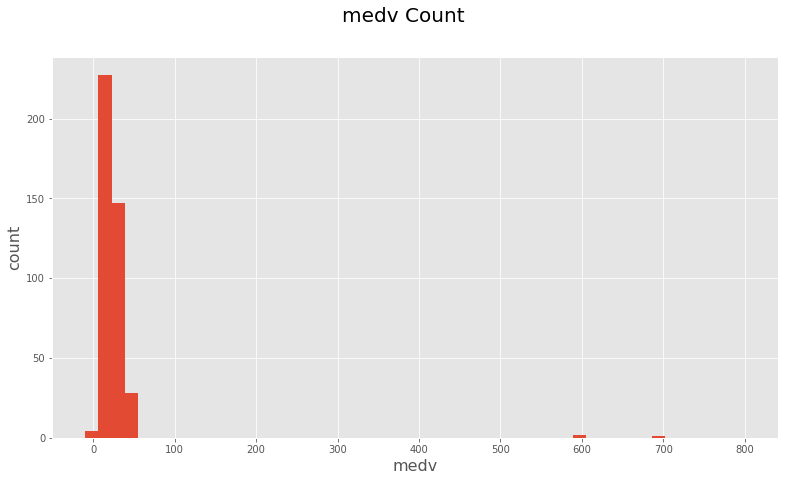

In [106]:
# Change the type of 'chas', 'rad' and 'tax' to rounded of Integers
outliers_X[:, [3, 8, 9]] = np.int64(np.round(outliers_X[:, [3, 8, 9]]))
print (train_X.shape)
print (outliers_X.shape)
train_X = np.append(train_X,outliers_X,axis=0)
train_y = np.append(train_y,medv_outliers,axis=0)

#Plot a histogram of medv in train_X
fig = plt.figure(figsize=(13,7))
plt.hist(train_y,bins=50,range = (-10,800))
fig.suptitle('medv Count',fontsize=20)
plt.xlabel('medv',fontsize=16)
plt.ylabel('count',fontsize=16)

In [107]:
train_X.shape

(409, 13)

In [110]:
#Again testing the regressor with the latest outlier data addition to check the performance
np.random.seed(9876)
mod = GradientBoostingRegressor(loss='lad')
fit == mod.fit(train_X,train_y)
predict = fit.predict(test_X)

print("Rmse -> %f"%rmse(predict,test_y))

Rmse -> 2.502158


In [115]:
mod = GradientBoostingRegressor(loss='ls')

In [116]:
mod

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [117]:
fit = mod.fit(train_X, train_y)

In [118]:
predict = fit.predict(test_X)

In [121]:
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 14.143783


#As we can see that due to the outliers in the data, model tries to fit and this affects the centered values, thus resulting in a greater loss. It's vital to remove as far as possible the outliers in the pre processing step